In [54]:
import torch 
from torch.utils.data import DataLoader
from torchvision import datasets,io,transforms
from torchvision.models.mobilenetv3 import *
from torchvision.models import MobileNet_V3_Small_Weights
from torch import nn
import timeit
import os

In [55]:
#device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [56]:
#Data Transform
data_tr=transforms.Compose([transforms.Resize(size=(224,224)),transforms.ToTensor()])

In [57]:
#Creating Dataset
train_data=datasets.ImageFolder(root=r'C:\Users\Sudip\Desktop\New folder\Data\Train data',transform=data_tr)
test_data=datasets.ImageFolder(root=r'C:\Users\Sudip\Desktop\New folder\Data\Test data',transform=data_tr)
Classes=train_data.classes
Classes

['Bandhani', 'Ilkal', 'Kasavu', 'Sambalpuri']

torch.Size([3, 224, 224])

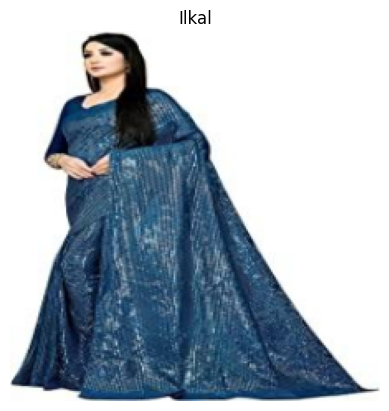

In [58]:
#Viewing the data
import matplotlib.pyplot as plt
import random
N=random.randint(0,500)
plt.imshow(train_data[N][0].permute(1,2,0))
plt.title(f"{Classes[train_data[N][1]]}")
plt.axis(False)
train_data[N][0].shape

In [59]:
#Creating dataloader
Batch_size=32
Train_dataloader=DataLoader(train_data,Batch_size,shuffle=True)
Test_dataloader=DataLoader(test_data,Batch_size,shuffle=True)
#test

In [60]:
#Using MobileNetv3
model_0=mobilenet_v3_small(weights=None)
model_0.classifier[3]=nn.Linear(in_features=1024,out_features=4,bias=True)
model_0.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [61]:
#loss function & optimiser
loss_fn=torch.nn.CrossEntropyLoss()
optim=torch.optim.Adam(params=model_0.parameters(),lr=0.001)

Epoch:0| Train accuracy:0.8768243879472692|Train loss:0.33484311540753153|Test acc:0.33095238095238094|Test loss:1.4678192098935445
Epoch:1| Train accuracy:0.905690913370998|Train loss:0.26339407410409493|Test acc:0.33095238095238094|Test loss:1.7795108993848165
Epoch:2| Train accuracy:0.9218455743879472|Train loss:0.21542322935568073|Test acc:0.3464285714285714|Test loss:2.079698391755422
Epoch:3| Train accuracy:0.9051612523540489|Train loss:0.27723588895494655|Test acc:0.7171130952380953|Test loss:0.7978575229644775
Epoch:4| Train accuracy:0.9279661016949152|Train loss:0.20462149631831858|Test acc:0.8577380952380953|Test loss:0.40657411540548005
Total time:151.86608069999966


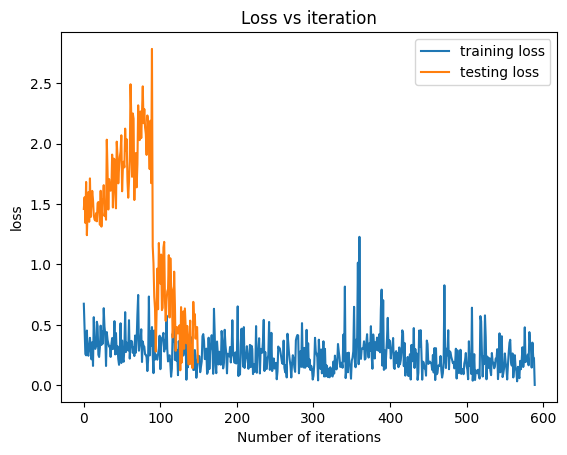

In [166]:
#Training and Testing
NUM_EPOCHS=5
st=timeit.default_timer()
train_loss_trend=[]
test_loss_trend=[]
train_loss_ep=[]
test_loss_ep=[]
for epoch in range(NUM_EPOCHS):
    #turning on training mode
    train_loss,train_acc,test_loss,test_acc,=0,0,0,0
    model_0.train()
    for batch, (X,y) in enumerate(Train_dataloader):
        #moving data to GPU
        X,y=X.to(device),y.to(device)
        y_=model_0(X)
        #calculating and storing loss
        #print(y)
        #print(y_)
        loss=loss_fn(y_,y)
        train_loss += loss.item()
        train_loss_trend.append(loss.item())
        optim.zero_grad()#necessary
        #backpropagation
        loss.backward()
        #step ahead with optimisation
        optim.step()
        #prediction accuracy
        y_pred_class = torch.argmax(torch.softmax(y_, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_)
    #turing on testing mode
    model_0.eval()
    with torch.inference_mode():
        for batch, (X,y) in enumerate(Test_dataloader):
            X,y=X.to(device),y.to(device)
            y_=model_0(X)
            loss=loss_fn(y_,y)
            test_loss += loss.item()
            test_loss_trend.append(loss.item())
            y_pred_class = torch.argmax(torch.softmax(y_, dim=1), dim=1)
            test_acc += (y_pred_class == y).sum().item()/len(y_)
    train_loss,train_acc,test_loss,test_acc=train_loss/len(Train_dataloader),train_acc/len(Train_dataloader),test_loss/len(Test_dataloader),test_acc/len(Test_dataloader)
    train_loss_ep.append(train_loss)
    test_loss_ep.append(test_loss)
    print(f"Epoch:{epoch}| Train accuracy:{train_acc}|Train loss:{train_loss}|Test acc:{test_acc}|Test loss:{test_loss}")
ed=timeit.default_timer()
print(f"Total time:{(ed-st)}")
plt.plot(train_loss_trend,label='training loss')
plt.plot(test_loss_trend,label='testing loss')
plt.title('Loss vs iteration')
plt.xlabel('Number of iterations')
plt.ylabel('loss')
plt.legend()

In [222]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()
print(output)

tensor(1.7983, grad_fn=<NllLossBackward0>)


In [165]:
# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
output = loss(input, target)
output.backward()
print(output)

tensor(1.9751, grad_fn=<DivBackward1>)


tensor([[-3.1070, -3.6402, -0.5191,  5.6814]], device='cuda:0')


(-0.5, 223.5, 223.5, -0.5)

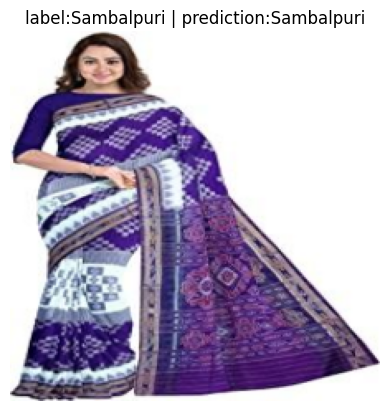

In [236]:
#Visualise the trained model
Datlod=DataLoader(test_data,1,True)
(X,y)=next(iter(Datlod))
y=y[0]
model_0.eval()
with torch.inference_mode():
    X=X.to(device)
    print(model_0(X))
    y_=model_0(X).argmax()
plt.imshow(X.to('cpu').squeeze().permute(1,2,0))
plt.title(f"label:{Classes[y]} | prediction:{Classes[y_]}")
plt.axis(False)

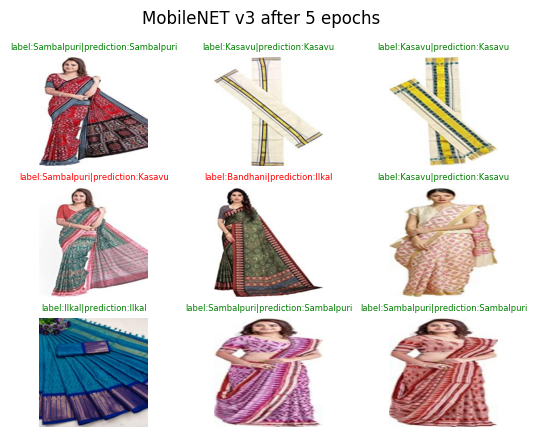

In [226]:
#Visualising the model
N=random.randint(0,1000)
Datlod=DataLoader(test_data,9,True)
(X,y)=next(iter(Datlod))
model_0.eval()
with torch.inference_mode():
    X=X.to(device)
    y=y.to(device)
    y_=torch.argmax(torch.softmax(model_0(X),dim=1),dim=1)
    for i in range(len(y)):
        if y_[i]==y[i]:
            plt.subplot(3,3,i+1)
            plt.imshow(X[i].to('cpu').squeeze().permute(1,2,0))
            plt.title(f"label:{Classes[y[i]]}|prediction:{Classes[y_[i]]}",color='g',fontsize=6)
            plt.axis(False)
        else:
            plt.subplot(3,3,i+1)
            plt.imshow(X[i].to('cpu').squeeze().permute(1,2,0))
            plt.title(f"label:{Classes[y[i]]}|prediction:{Classes[y_[i]]}",color='r',fontsize=6)
            plt.axis(False)
plt.suptitle(f"MobileNET v3 after {NUM_EPOCHS} epochs")
plt.show()

In [263]:
#Saving the code
from pathlib import Path
loc=r'C:\Users\Sudip\Desktop\New folder\models\model_0.pth'
torch.save(model_0.state_dict(),loc)

In [31]:
#Loading the Saved model
from pathlib import Path
loc=r'C:\Users\Sudip\Desktop\New folder\models\model_0.pth'
model_0_loaded=mobilenet_v3_small(weights=None)
model_0_loaded.classifier[3]=nn.Linear(in_features=1024,out_features=4,bias=True)
model_0_loaded.to(device)
model_0_loaded.load_state_dict(torch.load(loc))

<All keys matched successfully>

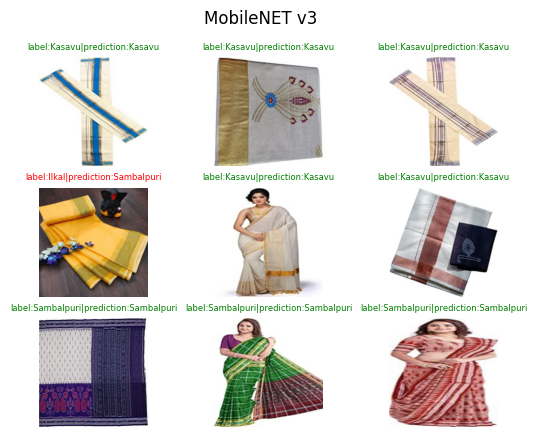

In [39]:
#Visualising the loaded model
N=random.randint(0,1000)
Datlod=DataLoader(test_data,9,True)
(X,y)=next(iter(Datlod))
model_0_loaded.eval()
with torch.inference_mode():
    X=X.to(device)
    y=y.to(device)
    y_=torch.argmax(torch.softmax(model_0_loaded(X),dim=1),dim=1)
    for i in range(len(y)):
        if y_[i]==y[i]:
            plt.subplot(3,3,i+1)
            plt.imshow(X[i].to('cpu').squeeze().permute(1,2,0))
            plt.title(f"label:{Classes[y[i]]}|prediction:{Classes[y_[i]]}",color='g',fontsize=6)
            plt.axis(False)
        else:
            plt.subplot(3,3,i+1)
            plt.imshow(X[i].to('cpu').squeeze().permute(1,2,0))
            plt.title(f"label:{Classes[y[i]]}|prediction:{Classes[y_[i]]}",color='r',fontsize=6)
            plt.axis(False)

plt.suptitle(f"MobileNET v3")
plt.show()

Training a Mobilenet3 model with ECANET

In [40]:
#initalising a mobilenet3 model
model_1_ECA=mobilenet_v3_small(weights=None)

In [41]:
#ECA layer definition
import torch
from torch import nn
from torch.nn.parameter import Parameter

class eca_layer(nn.Module):
    """Constructs a ECA module.

    Args:
        channel: Number of channels of the input feature map
        k_size: Adaptive selection of kernel size
    """
    def __init__(self, channel, k_size=3):
        super(eca_layer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.conv = nn.Conv1d(1, 1, kernel_size=k_size, padding=(k_size - 1) // 2, bias=False) 
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # feature descriptor on the global spatial information
        y = self.avg_pool(x)

        # Two different branches of ECA module
        y = self.conv(y.squeeze(-1).transpose(-1, -2)).transpose(-1, -2).unsqueeze(-1)

        # Multi-scale information fusion
        y = self.sigmoid(y)

        return x * y.expand_as(x)
        

In [42]:
#Incorporating the ECA layers
for i in range(1,12):
    model_1_ECA.features[i].block.append(eca_layer(24,3))

In [43]:
#Reducing the number of parameters
model_1_ECA.classifier[3]=nn.Linear(in_features=1024,out_features=4,bias=True)
model_1_ECA.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [44]:
#loss function & optimiser 
loss_fn=torch.nn.CrossEntropyLoss()
optim=torch.optim.Adam(params=model_1_ECA.parameters(),lr=0.001)

Epoch:0| Train accuracy:0.782015065913371|Train loss:0.6238993793978529|Test acc:0.5043154761904762|Test loss:1.164282743136088
Epoch:1| Train accuracy:0.8633474576271186|Train loss:0.36992340692776743|Test acc:0.334672619047619|Test loss:1.14032275279363
Epoch:2| Train accuracy:0.8872704802259888|Train loss:0.29899629060242133|Test acc:0.33095238095238094|Test loss:1.224501383304596
Epoch:3| Train accuracy:0.9153719397363465|Train loss:0.2375452615383823|Test acc:0.3630952380952381|Test loss:1.3174733777840932
Epoch:4| Train accuracy:0.9263771186440678|Train loss:0.2023038362484362|Test acc:0.6961309523809525|Test loss:0.8041570246219635
Total time:167.35130290000006


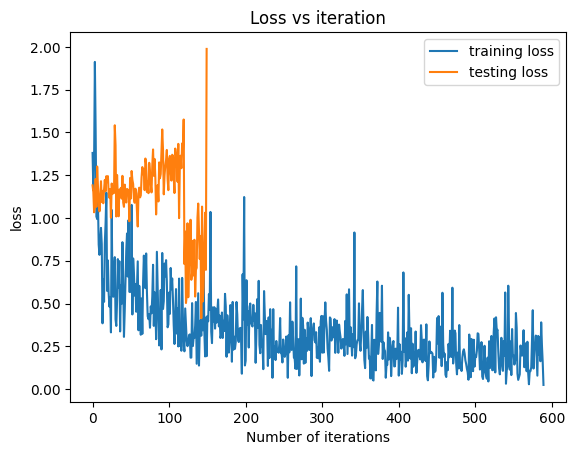

In [45]:
#Training and Testing
NUM_EPOCHS=5
st=timeit.default_timer()
train_loss_trend=[]
test_loss_trend=[]
for epoch in range(NUM_EPOCHS):
    #turning on training mode
    train_loss,train_acc,test_loss,test_acc,=0,0,0,0
    model_1_ECA.train()
    for batch, (X,y) in enumerate(Train_dataloader):
        #moving data to GPU
        X,y=X.to(device),y.to(device)
        y_=model_1_ECA(X)
        #calculating and storing loss
        loss=loss_fn(y_,y)
        train_loss += loss.item()
        train_loss_trend.append(loss.item())
        optim.zero_grad()#necessary
        #backpropagation
        loss.backward()
        #step ahead with optimisation
        optim.step()
        #prediction accuracy
        y_pred_class = torch.argmax(torch.softmax(y_, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_)
    #turing on testing mode
    model_1_ECA.eval()
    with torch.inference_mode():
        for batch, (X,y) in enumerate(Test_dataloader):
            X,y=X.to(device),y.to(device)
            y_=model_1_ECA(X)
            loss=loss_fn(y_,y)
            test_loss += loss.item()
            test_loss_trend.append(loss.item())
            y_pred_class = torch.argmax(torch.softmax(y_, dim=1), dim=1)
            test_acc += (y_pred_class == y).sum().item()/len(y_)
    train_loss,train_acc,test_loss,test_acc,=train_loss/len(Train_dataloader),train_acc/len(Train_dataloader),test_loss/len(Test_dataloader),test_acc/len(Test_dataloader)
    print(f"Epoch:{epoch}| Train accuracy:{train_acc}|Train loss:{train_loss}|Test acc:{test_acc}|Test loss:{test_loss}")
ed=timeit.default_timer()
print(f"Total time:{(ed-st)}")
plt.plot(train_loss_trend,label='training loss')
plt.plot(test_loss_trend,label='testing loss')
plt.title('Loss vs iteration')
plt.xlabel('Number of iterations')
plt.ylabel('loss')
plt.legend()

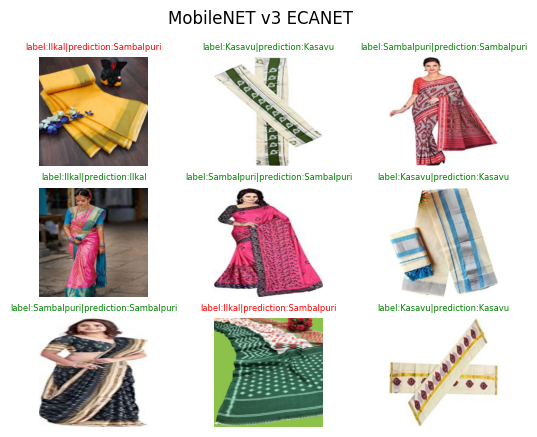

In [48]:
#Visualising the loaded model
N=random.randint(0,1000)
Datlod=DataLoader(test_data,9,True)
(X,y)=next(iter(Datlod))
model_1_ECA.eval()
with torch.inference_mode():
    X=X.to(device)
    y=y.to(device)
    y_=torch.argmax(torch.softmax(model_1_ECA(X),dim=1),dim=1)
    for i in range(len(y)):
        if y_[i]==y[i]:
            plt.subplot(3,3,i+1)
            plt.imshow(X[i].to('cpu').squeeze().permute(1,2,0))
            plt.title(f"label:{Classes[y[i]]}|prediction:{Classes[y_[i]]}",color='g',fontsize=6)
            plt.axis(False)
        else:
            plt.subplot(3,3,i+1)
            plt.imshow(X[i].to('cpu').squeeze().permute(1,2,0))
            plt.title(f"label:{Classes[y[i]]}|prediction:{Classes[y_[i]]}",color='r',fontsize=6)
            plt.axis(False)

plt.suptitle(f"MobileNET v3 ECANET")
plt.show()